In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
im = cv.imread("moravec.bmp")
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define the window size
window_size = 11

# Define the translation coordinates
translation_coords = [-5, -3, -1, 1, 3, 5]

# Initialize an empty image to store the detected points
points_image = np.zeros_like(im_gray)

# Iterate over each pixel in the image
for y in range(window_size // 2, im_gray.shape[0] - window_size // 2):
    for x in range(window_size // 2, im_gray.shape[1] - window_size // 2):
        # Calculate the SM for each translation
        sm_values = []
        for a in translation_coords:
            for b in translation_coords:
                # Translate the window
                translated_window = im_gray[y - window_size // 2 + a: y + window_size // 2 + a + 1,
                                             x - window_size // 2 + b: x + window_size // 2 + b + 1]
                # Calculate the sum of squared differences
                ssd = np.sum(np.square(im_gray[y, x] - translated_window))
                sm_values.append(ssd)
        
        # Find the minimum SM value
        min_sm = min(sm_values)
        
        # If the minimum SM value is less than a threshold, mark the pixel as a point of interest
        threshold = 1000  # Adjust this threshold as needed
        if min_sm < threshold:
            points_image[y, x] = 255

# Count the number of detected points of interest
num_points = np.count_nonzero(points_image)


Detected Points of Interest : 174683


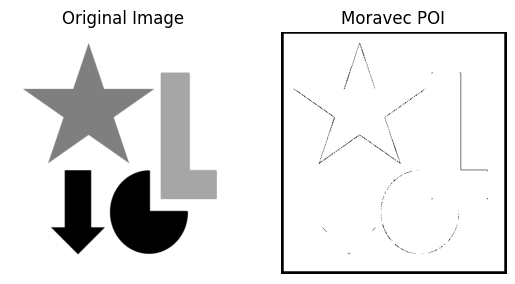

In [8]:
print(f"Detected Points of Interest : {num_points}")

# Display the points of interest image
plt.subplot(1, 2, 1)
plt.imshow(im_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(points_image, cmap='gray')
plt.title("Moravec POI")
plt.axis('off')
plt.show()